In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


litho = pd.read_csv("log.csv")
litho.head()



,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
0,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576
1,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495
2,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944
3,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645
4,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659


Text(0.5, 1.0, 'Boxplot of Rild')

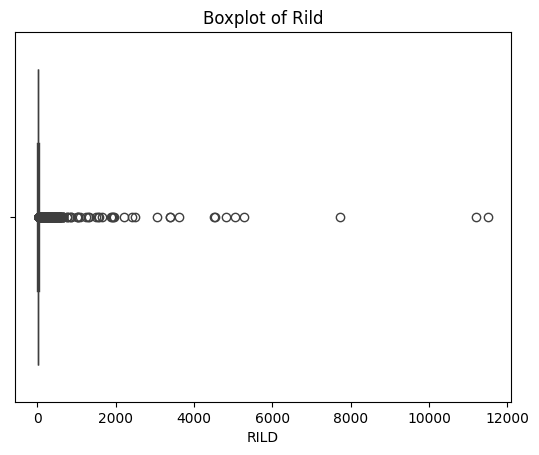

In [68]:
#To view outliers in our Rild (Deep Induction Restivity) since they are one of the most importamt feature and any unusual or extreme values can significantly impact our analysis 
sns.boxplot(x=litho["RILD"])
plt.title("Boxplot of Rild")

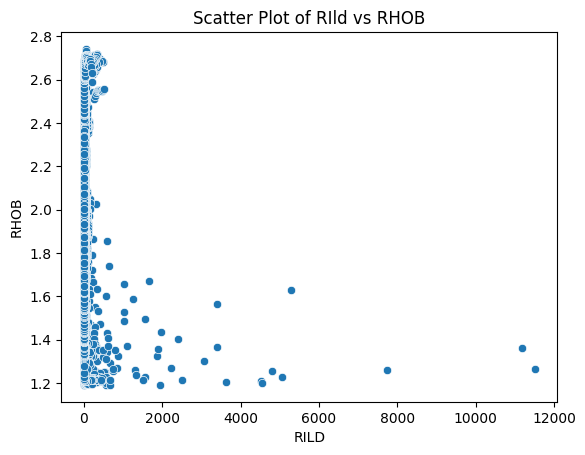

In [69]:
sns.scatterplot(x="RILD", y="RHOB", data=litho)
plt.title("Scatter Plot of RIld vs RHOB")
plt.show()

In [70]:
#To Create boxplots for all numerical features
#for col in litho.select_dtypes(include=np.number).columns:
#    plt.figure()
#    sns.boxplot(x=litho[col])
#    plt.title(f"Boxplot of {col}")
#    plt.show()

In [71]:
#Remove outliers in the Rild features
litho = litho[litho["RILD"] <= 8000]

print(litho["RILD"].max())

7726.373


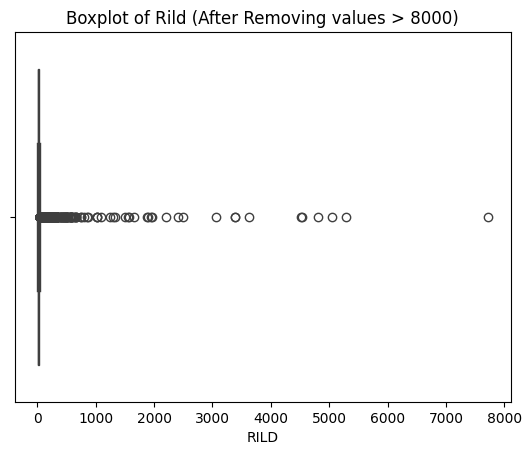

<Figure size 1600x1200 with 0 Axes>

In [72]:
sns.boxplot(x=litho["RILD"])
plt.title("Boxplot of Rild (After Removing values > 8000)")
plt.figure(figsize = (8,6), dpi=200)

plt.show()

In [73]:
#Feature Engineering 
#Ratios: This ratios helps to identify zones where fluid properties close to the wellbore differ significantly from the fuild properties deeper in the formation e.g the ratios of deep to shallow restivity logs provide a comparison of the fluid stauration at different distances from the borehole which helps to identify permeable zones and potential hydrocarbon-bearing intervals
litho['RILD_RLL3_ratio'] = litho['RILD'] / litho['RLL3']
litho['MN_MI_ratio'] = litho['MN'] / litho['MI']

#Differences: The differences in caliper measurements and the derivative of the SP log highlight borehole irregularities and chnages in the elctrochemical potential respectively. This can highlight changes in borehole conditions and formation properties which can indictae fractures, lithological boundaries and permeability variations.
litho['MCAL - DCAL_diff'] = litho['MCAL'] - litho['DCAL']
litho['SP_diff'] = litho['SP'].diff()

#Derivatives:This highlights abrupt chnages in restivity and density which can indicate formation boundaries or fluid contacts(crucial for reservoir modelling) these chnages are often associated with transitions between diffrent lithofacies i.e they highlight abrupt chnages in rock properties, which can indictae formation boundaries, fluid contacts and rapid variations in porosity.
litho['RILD_derivatives'] = litho['RILD'].diff()
litho['RHOB_derivatives'] = litho['RHOB'].diff()

#Rolling Averages: This helps to smooth out noisy log data, highlighting long term trends in properties like shale content and porosity. This helps to better identify lithology changes, and get a better trend for the reservoir properties
window_size = 5
litho['SP_rolling_mean'] = litho['SP'].rolling(window=window_size).mean()
litho['RHOB_rolling_mean'] = litho['RHOB'].rolling(window=window_size).mean()

# Handle potential NaN or infinite values from calculations
litho.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
litho.fillna(0, inplace=True) # or other appropriate value.



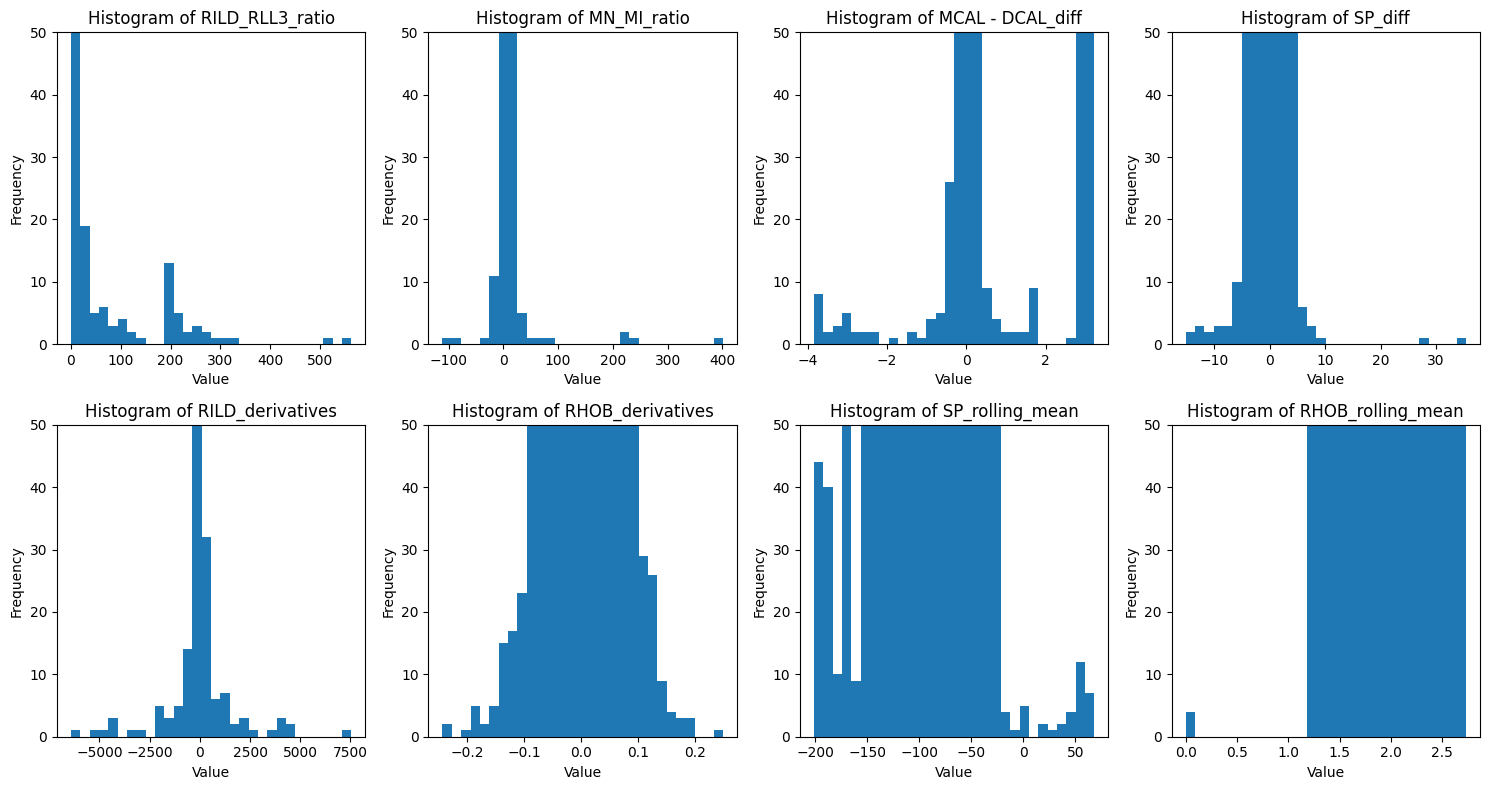

In [74]:
# List of features to plot
features = ['RILD_RLL3_ratio', 'MN_MI_ratio', 'MCAL - DCAL_diff', 'SP_diff',
            'RILD_derivatives', 'RHOB_derivatives', 'SP_rolling_mean', 'RHOB_rolling_mean']

# Create subplots in a 4x2 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8)) #Adjust figsize as needed.

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    axes[i].hist(litho[feature].dropna(), bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(0, 50)  # Fixed y-axis limit

plt.tight_layout()
plt.show()


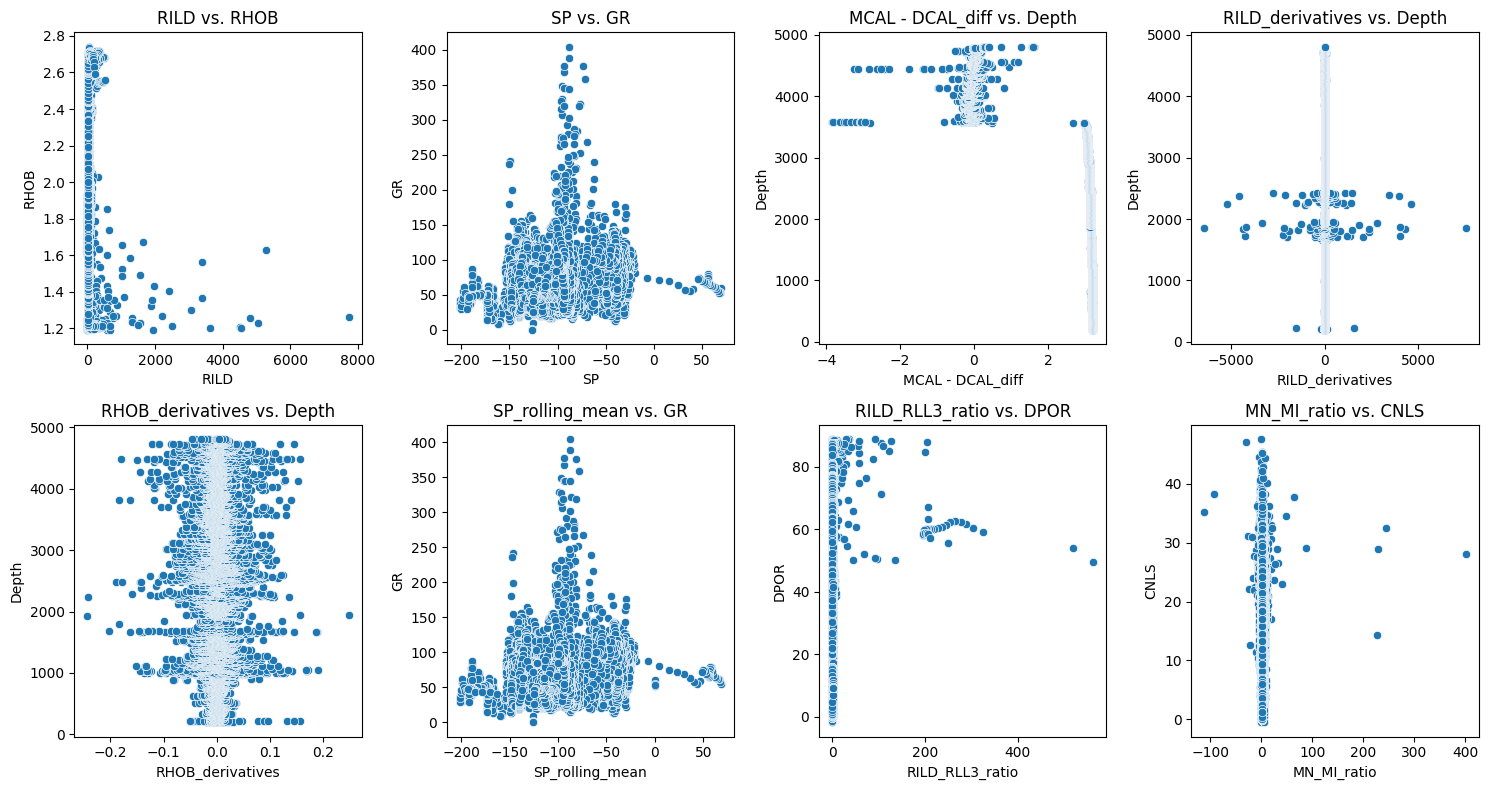

In [75]:
scatter_pairs = [('RILD', 'RHOB'),('SP', 'GR'),('MCAL - DCAL_diff', 'Depth'),('RILD_derivatives', 'Depth'),
    ('RHOB_derivatives', 'Depth'),('SP_rolling_mean', 'GR'),('RILD_RLL3_ratio', 'DPOR'), 
    ('MN_MI_ratio', 'CNLS')
]
# Create subplots in a 4x2 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8)) #Adjust figsize as needed.

# Flatten the axes array for easier indexing
axes = axes.flatten()
#Plot Scatter Plot for each feature
for i, (col1, col2) in enumerate(scatter_pairs):
    sns.scatterplot(x=litho[col1], y=litho[col2], ax=axes[i]) 
    axes[i].set_title(f'{col1} vs. {col2}')
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)

plt.tight_layout()
plt.show()


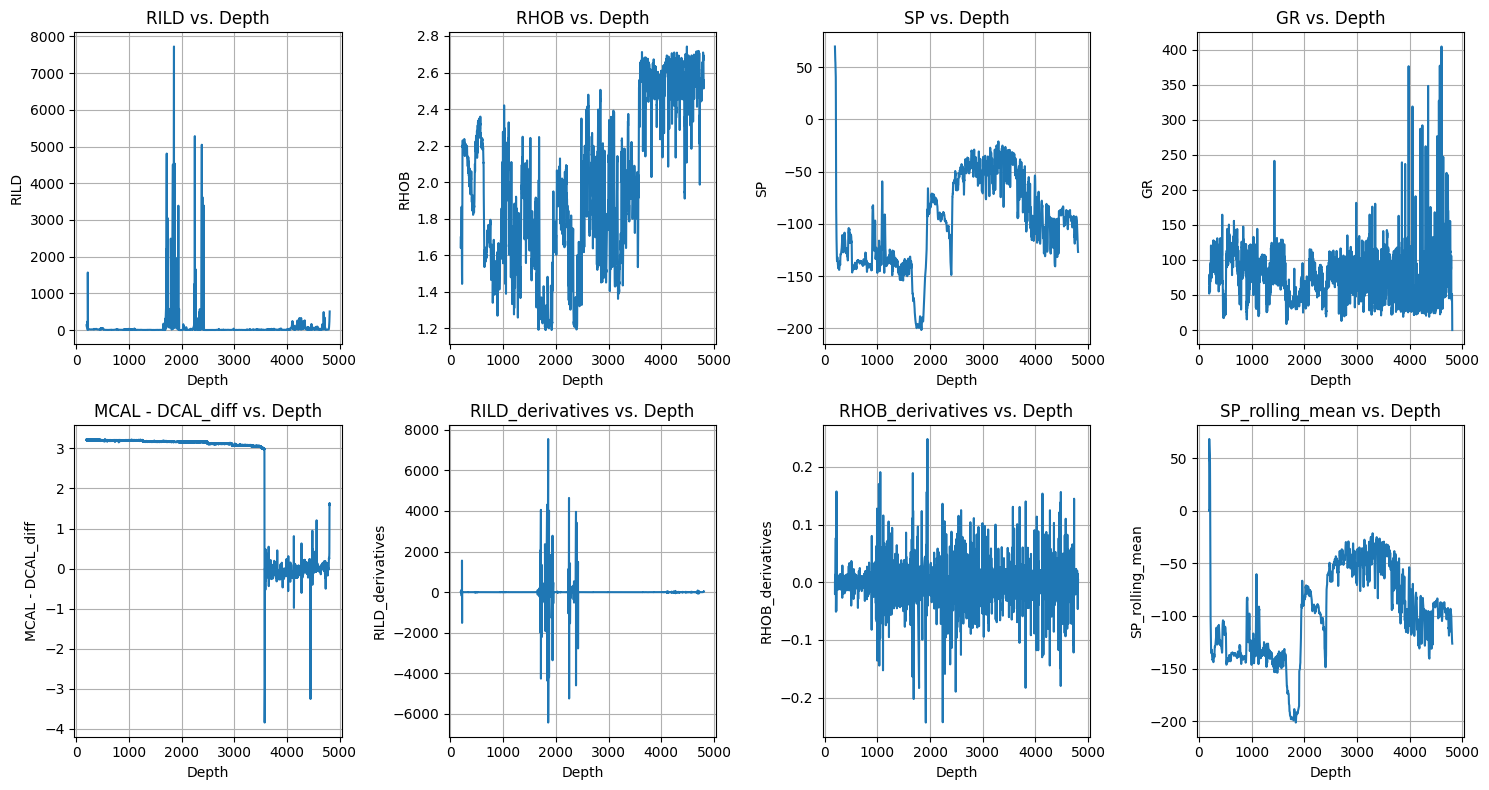

In [76]:
# Features to plot against depth
depth_features = [
    'RILD', 'RHOB', 'SP', 'GR', 'MCAL - DCAL_diff',
    'RILD_derivatives', 'RHOB_derivatives',
    'SP_rolling_mean', 'RILD_RLL3_ratio', 'MN_MI_ratio'
]

# Create subplots in a 4x2 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))  # Adjust figsize as needed.

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot depth plots for each feature
for i, feature in enumerate(depth_features):
    if i < 8: # Only plot the first 8 features to fit the 4x2 grid
        axes[i].plot(litho['Depth'], litho[feature])
        axes[i].set_title(f'{feature} vs. Depth')
        axes[i].set_xlabel('Depth')
        axes[i].set_ylabel(feature)
        axes[i].grid(True)

plt.tight_layout()
plt.show()

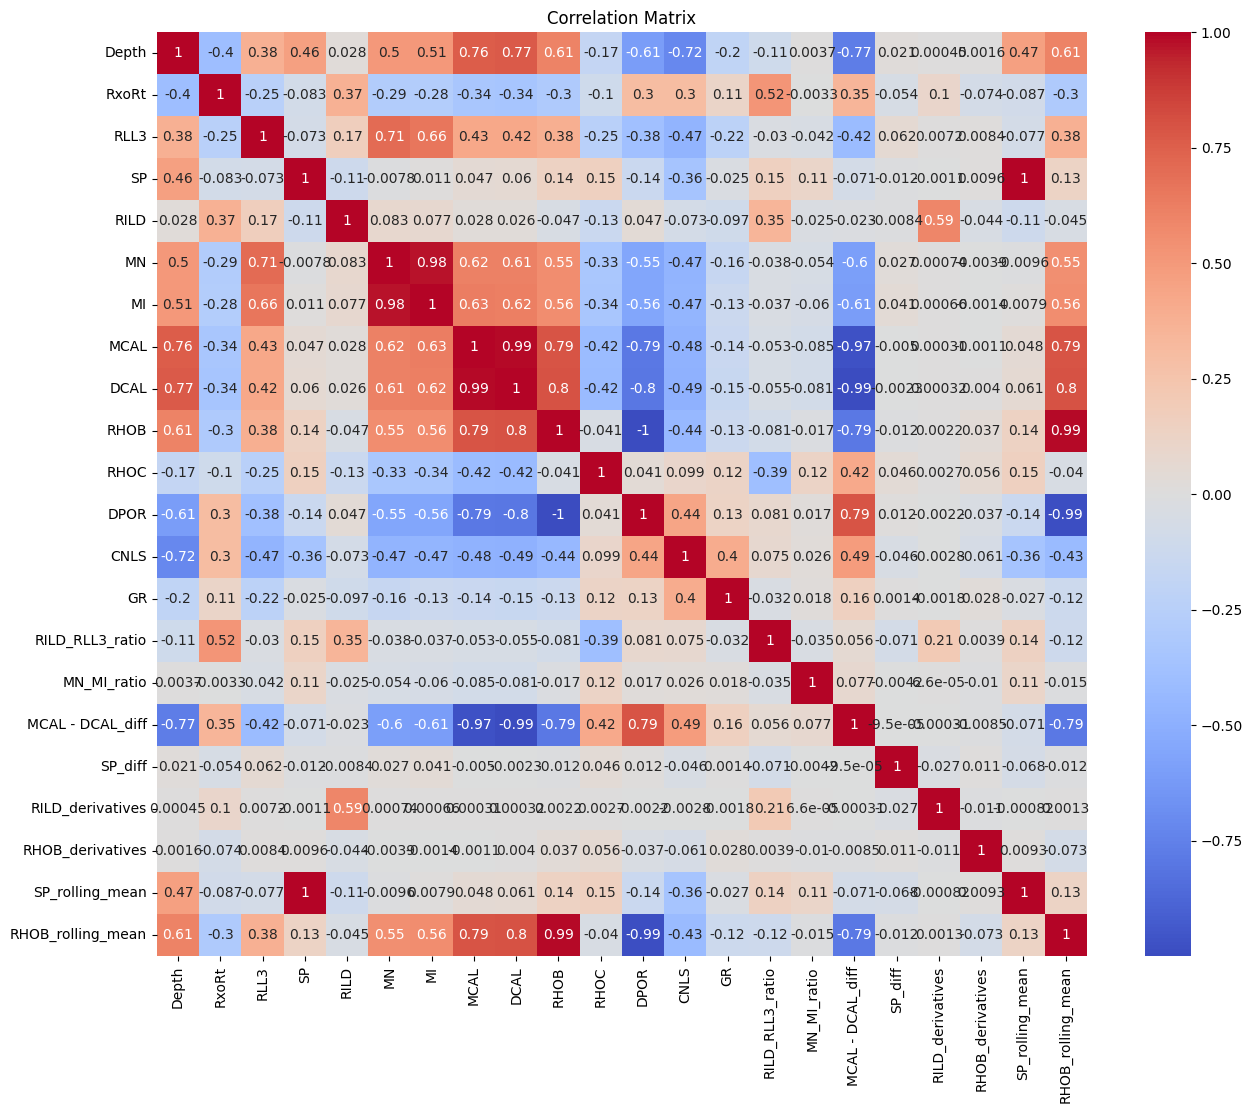

In [77]:
correlation_matrix = litho.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [78]:
#Some columns are highly correlated with each other, so to avoid multicollinearity.
litho = litho.drop(['MCAL', 'MI'], axis=1)
print(litho.columns)

Index(['Depth', 'RxoRt', 'RLL3', 'SP', 'RILD', 'MN', 'DCAL', 'RHOB', 'RHOC',
       'DPOR', 'CNLS', 'GR', 'RILD_RLL3_ratio', 'MN_MI_ratio',
       'MCAL - DCAL_diff', 'SP_diff', 'RILD_derivatives', 'RHOB_derivatives',
       'SP_rolling_mean', 'RHOB_rolling_mean'],
      dtype='object')


In [80]:
litho_features = litho[['GR', 'RHOB', 'RILD', 'SP', 'RILD_RLL3_ratio', 'MCAL - DCAL_diff', 'RHOB_derivatives', 'RILD_derivatives']].copy()

#Scaling of our dataset to avoid irregualrities in our clustering.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(litho_features)
scaled_features_df = pd.DataFrame(scaled_features, columns=litho_features.columns)


In [113]:
#Using principal component analysis to regularize my data
from sklearn.decomposition import PCA
#Initialize PCA
pca = PCA()

#Fit and transform the data
pca_features = pca.fit_transform(scaled_features_df)

#Create a PCA DataFrame
pca_features_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

print(pca_features_df.head())


        PC1       PC2        PC3       PC4       PC5        PC6       PC7  \
0  4.663804  8.373816  12.820457  2.411685 -1.439717  12.364670 -3.974357   
1  4.388889  7.845212  12.073728  2.936285 -1.241238  11.457162 -3.691325   
2  4.199071  7.450081  11.592935  2.968178 -1.202528  10.766264 -3.484596   
3  4.061970  7.123304  11.275440  2.743827 -1.227222  10.241534 -3.311756   
4  3.909788  6.785149  10.988212  2.363386 -1.302241   9.718395 -3.128640   

        PC8  
0  0.149046  
1  0.174656  
2  0.221793  
3  0.255801  
4  0.270337  


C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

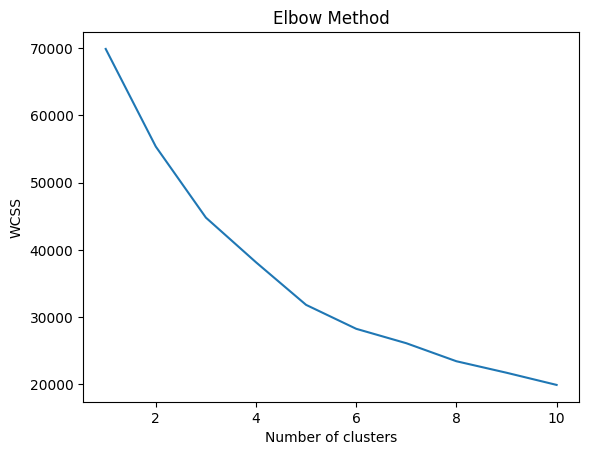

In [114]:
#We will be using the elbow method to determine the optimal number of clusters needed for our K-Means Clustering
from sklearn.cluster import KMeans

wcss = []     #wcss means within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features_df)
    wcss.append(kmeans.inertia_)   #inertia is the within-cluster sum of squares

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [117]:
#From my elbow method, the ideal optimal number of cluster is 5 i.e k = 5
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(pca_features_df)

#Add Cluster labels to original DataFraame
litho['cluster'] = clusters

#To show the amount of data points in each cluster
print(litho['cluster'].value_counts()) 

C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    6234
0    2462
2      27
3      14
Name: count, dtype: int64


C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

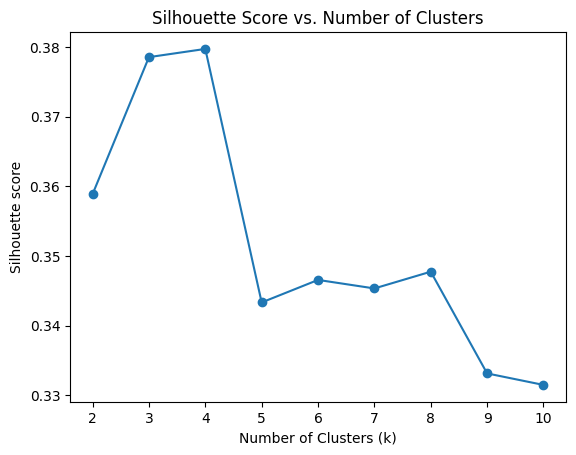

Optimal number of clusters (k): 4


In [115]:
#TRying out sillhouette score method to determine the number of k
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features_df)
    silhouette_avg = silhouette_score(scaled_features_df, clusters)
    silhouette_scores.append(silhouette_avg)

#plot Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters') 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette score')
plt.show()   

#find optimal k
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (k): {optimal_k}")

In [118]:
# Run K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features_df)

# Add cluster labels to original DataFrame
litho['cluster'] = clusters

print(litho['cluster'].value_counts()) #Show the amount of data points in each cluster.

cluster
1    6234
0    2462
2      27
3      14
Name: count, dtype: int64


C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [122]:
from sklearn.cluster import DBSCAN

# Initialize PCA (choose number of components based on explained variance)
pca = PCA(n_components=8)  # Example: 4 components

# Fit and transform the data
pca_features = pca.fit_transform(scaled_features_df)

# Create a PCA DataFrame
pca_features_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

#Reset the index to match the litho dataframe.
pca_features_df.index = litho.index

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.0, min_samples=3)  # Adjust eps and min_samples
clusters = dbscan.fit_predict(pca_features_df)

# Add cluster labels to original DataFrame
litho['cluster_dbscan_pca'] = clusters

print(litho['cluster_dbscan_pca'].value_counts())


cluster_dbscan_pca
 1     6113
 7     2436
-1      112
 0       23
 6       11
 9       11
 5        8
 2        7
 10       6
 3        4
 4        3
 8        3
Name: count, dtype: int64


From the result above, KMeans Clustering produce an highly imbalance result, with only one dominant cluster. The small clusters indictae that K-Means is struggling to separate distinct groups of data points, even though the optimal k was found, the result gotten was still very poor. While for DBScan clustering produce more balanced clusters compared to K-Means, DBScan identified some point as noise, which can b euseful for identifying outliers, though the results are sensitive to parameters but the result are better than K-Means.
Given the better results, we will focus on interpreting the DBSCAN clusters.

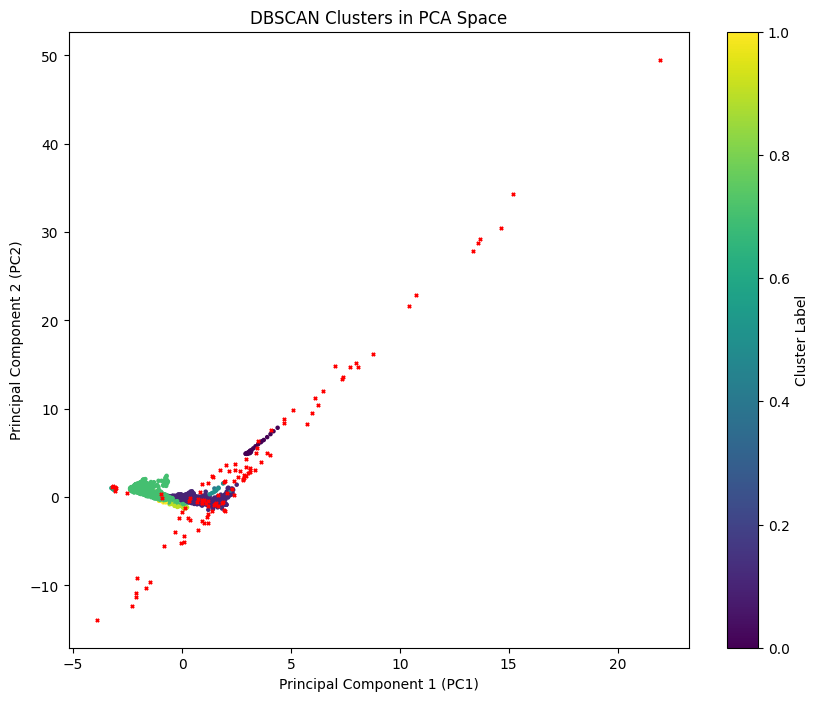

In [ ]:
#Visualization of the DBSCAN clusters in PCA space
plt.figure(figsize=(10, 8))

# Create a scatter plot with noise points shown in a different color
noise_points = litho['cluster_dbscan_pca'] == -1
plt.scatter(
    pca_features_df['PC1'][~noise_points],
    pca_features_df['PC2'][~noise_points],
    c=litho['cluster_dbscan_pca'][~noise_points],
    cmap='viridis',
    s=5
)

plt.scatter(
    pca_features_df['PC1'][noise_points],
    pca_features_df['PC2'][noise_points],
    c='red', # Use red to show noise points.
    s=5,
    marker='x' # Use x to show noise points.
)

plt.title('DBSCAN Clusters in PCA Space')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster Label')

plt.show()

From our graph it shows that there are two main lithofacies associations, A Denser Cluster(One at the bottom left) and an Elongated Cluster (one with a Diagonal line shape). THe Denser Cluster likely represents a relatively homogenous lithofacies, possibly a massive shale, pr a tight carbonate with low porosity and permeability and the compactness suggests a consistent, uniform texture and composition. There is also an Elongated Cluster which might represent a more heterogenous lithofacies, such as a sandy shale, laminated snadstone, or a fractured carbonate. The elongation suggests a gradual change in properties along the principal components. This could be due to variations in grain size, clay content, or fracture density.
The Noise points are divided into three, they are Boundary Noise, Isolated Noise and the Noise Patterns. For the Boundary Noise, these are points located at the edges of the clusters, which likely represenr transitional lithofacies or interbedded layers. They could be zones where shale grades into snadstones or where carbonate contains thin shale stringers. For the Isolated Noise i.e the points far from the clusters, might represent unusual lithofacies such as nodules, conceretions or highly fractured zones, they could also be drilling artifacts or sensir errors. For the Noise Patterns, the noise points bettween the two main clusters may indicate the presence of thin beds or lenses of a different lithofacies, such as thin sand streaks within a shale sequence.
There are also small clusters which are likely to represent subtle variations within the main lithofacies or less common lithofacies that are not as prevalent in the well, like the small clusters near the denser cluster they might be calcareous shales or argillaseous carbonates and small ckusters along the elongated cluster might be slightly cleaner snadstones or more farctures carbonates.
PC1: This component likelty captires variations in properties that have a significant impact on the overall variabilty of the well log data. it could be related to chnages in porosity, permeability, or bulk density.
PC2: This component likely captures variations that are orthogonal to PC1. it could be related to chnages in clay content, mineralogy, or fluid saturation. and the distribution of lithofacies along PC1 and PC2 suggests that these properties are important for distinguishing between them.
The presence of a massive shale or tight carbonate (denser cluster) and a sandy shale or laminated sandstone (elongated cluster) suggests a sedimentary environment with varying energy levels. The presence of noise points and elomgated clusters might indicate the presence of fractured zones or faults. 
The presence of numeorus small clusters and noise points suggests that the formation is heterogenous, with variations in lithology and properties.

In [125]:
#To calculate the average well log values for our cluster
log_cols = ['GR', 'RHOB', 'RILD', 'SP']  # Add more logs as needed

cluster_means = litho.groupby('cluster_dbscan_pca')[log_cols].mean()

print(cluster_means)

                            GR      RHOB        RILD          SP
cluster_dbscan_pca                                              
-1                   62.948695  1.520579  870.350387 -122.362174
 0                   66.291791  1.688452   90.389717   57.959730
 1                   80.988489  1.831334   12.205601  -95.203894
 2                   34.811100  1.632486   12.049600 -168.741900
 3                   39.480125  1.261750  193.305625 -194.929100
 4                   74.003067  1.485300  254.469000  -96.706533
 5                   23.202575  1.387212  327.064075  -98.180675
 6                  129.158364  2.433364    3.940909  -41.327609
 7                   66.052328  2.569565   41.078730  -92.089236
 8                   79.282133  2.254167    9.997033  -78.914833
 9                  350.916564  2.324191   21.120345  -87.763945
 10                 247.964550  2.448600   20.264017  -84.517583


For the result above Cluster -1 (Noise) has a Moderate GR which suggests some clay content, a moderate RHOB which indicates moderate density, an High RILD which indicates high restivity, suggesting a tight formation, a moderate SP which indicates some shale content. This cluster likely represents a mix of data points, including outliers, transitional zones or unusual lithologies.
Cluster 0: Moderate GR (66.29): Indicates some clay content. 
           Moderate RHOB (1.69): Indicates moderate density.
           Low RILD (90.39): Suggests a water-saturated formation.
           Moderate SP (57.96): Indicates a permeable formation.
This cluster may represent a zone of permeable, water-saturated shale or a shaly sandstone.
Cluster 1: High GR (80.99): Indicates high clay content.
           High RHOB (1.83): Indicates relatively high density.
           Very low RILD (12.21): Suggests a conductive formation, likely shale.
           Low SP (-95.20): Indicates shale.
This cluster strongly suggests a shale lithofacies.
Cluster 2: Low GR (34.81): Indicates low clay content.
           Moderate RHOB (1.63): Indicates moderate density.
           Very low RILD (12.05): Suggests a conductive formation.
           Very low SP (-168.74): Indicates shale.
This is a bit of a weird result. The low GR should mean less shale, but the very low SP and RILD, mean shale. There is a chance that this is a zone with a high amount of pyrite, or some other conductive mineral.
Cluster 3: Low GR (39.48): Indicates low clay content.
           Very low RHOB (1.26): Indicates very low density.
           High RILD (193.31): Indicates high resistivity.
           Very low SP (-194.93): Indicates shale.
This is another odd result. The low RHOB and low GR may indicate a porous sandstone, but the very high RILD and very low SP do not match that.
Cluster 4: Moderate GR (74.00): Indicates moderate clay content.
           Low RHOB (1.49): Indicates low density.
           High RILD (254.47): Indicates high resistivity.
           Low SP (-96.71): Indicates shale.
This cluster likely represents a shaly formation with high resistivity, potentially due to hydrocarbons or a tight formation.
Cluster 5: Very low GR (23.20): Indicates very low clay content.
           Low RHOB (1.39): Indicates low density.
           High RILD (327.06): Indicates high resistivity.
           Low SP (-98.18): Indicates shale.
This cluster likely represents a sandstone or carbonate formation with high resistivity.
Cluster 6: Very high GR (129.16): Indicates very high clay content.
           Very high RHOB (2.43): Indicates very high density.
           Very low RILD (3.94): Indicates very low resistivity.
           Moderate SP (-41.33): Indicates shale.
This cluster strongly suggests a very dense shale, possibly a metallic shale.
Cluster 7:  Moderate GR (66.05): Indicates moderate clay content.
            Very high RHOB (2.57): Indicates very high density.
            Low RILD (41.08): Indicates low resistivity.
            Low SP (-92.09): Indicates shale.
This cluster likely represents a dense formation, possibly a carbonate or a very dense shale. 
Cluster 8: High GR (79.28): Indicates high clay content.
           High RHOB (2.25): Indicates high density.
           Very low RILD (10.00): Indicates very low resistivity.
           Low SP (-78.91): Indicates shale.
This cluster strongly suggests a dense shale.
Cluster 9: Very high GR (350.92): Indicates very high clay content.
           High RHOB (2.32): Indicates high density.
           Low RILD (21.12): Indicates low resistivity.
           Low SP (-87.76): Indicates shale.
This cluster strongly suggests a very dense and radioactive shale.
Cluster 10: Very high GR (247.96): Indicates very high clay content.
            Very high RHOB (2.45): Indicates very high density.
            Low RILD (20.26): Indicates low resistivity.
            Low SP (-84.52): Indicates shale.
This cluster strongly suggests a very dense and radioactive shale.
Many clusters indicate shale lithofacies, but with variations in density, clay content, and resistivity. Some clusters suggest sandstone or carbonate formations.
The noise cluster (-1) displays high resistivity, indicating a tight formation.
There are some results that are very odd, and would require further investigation.

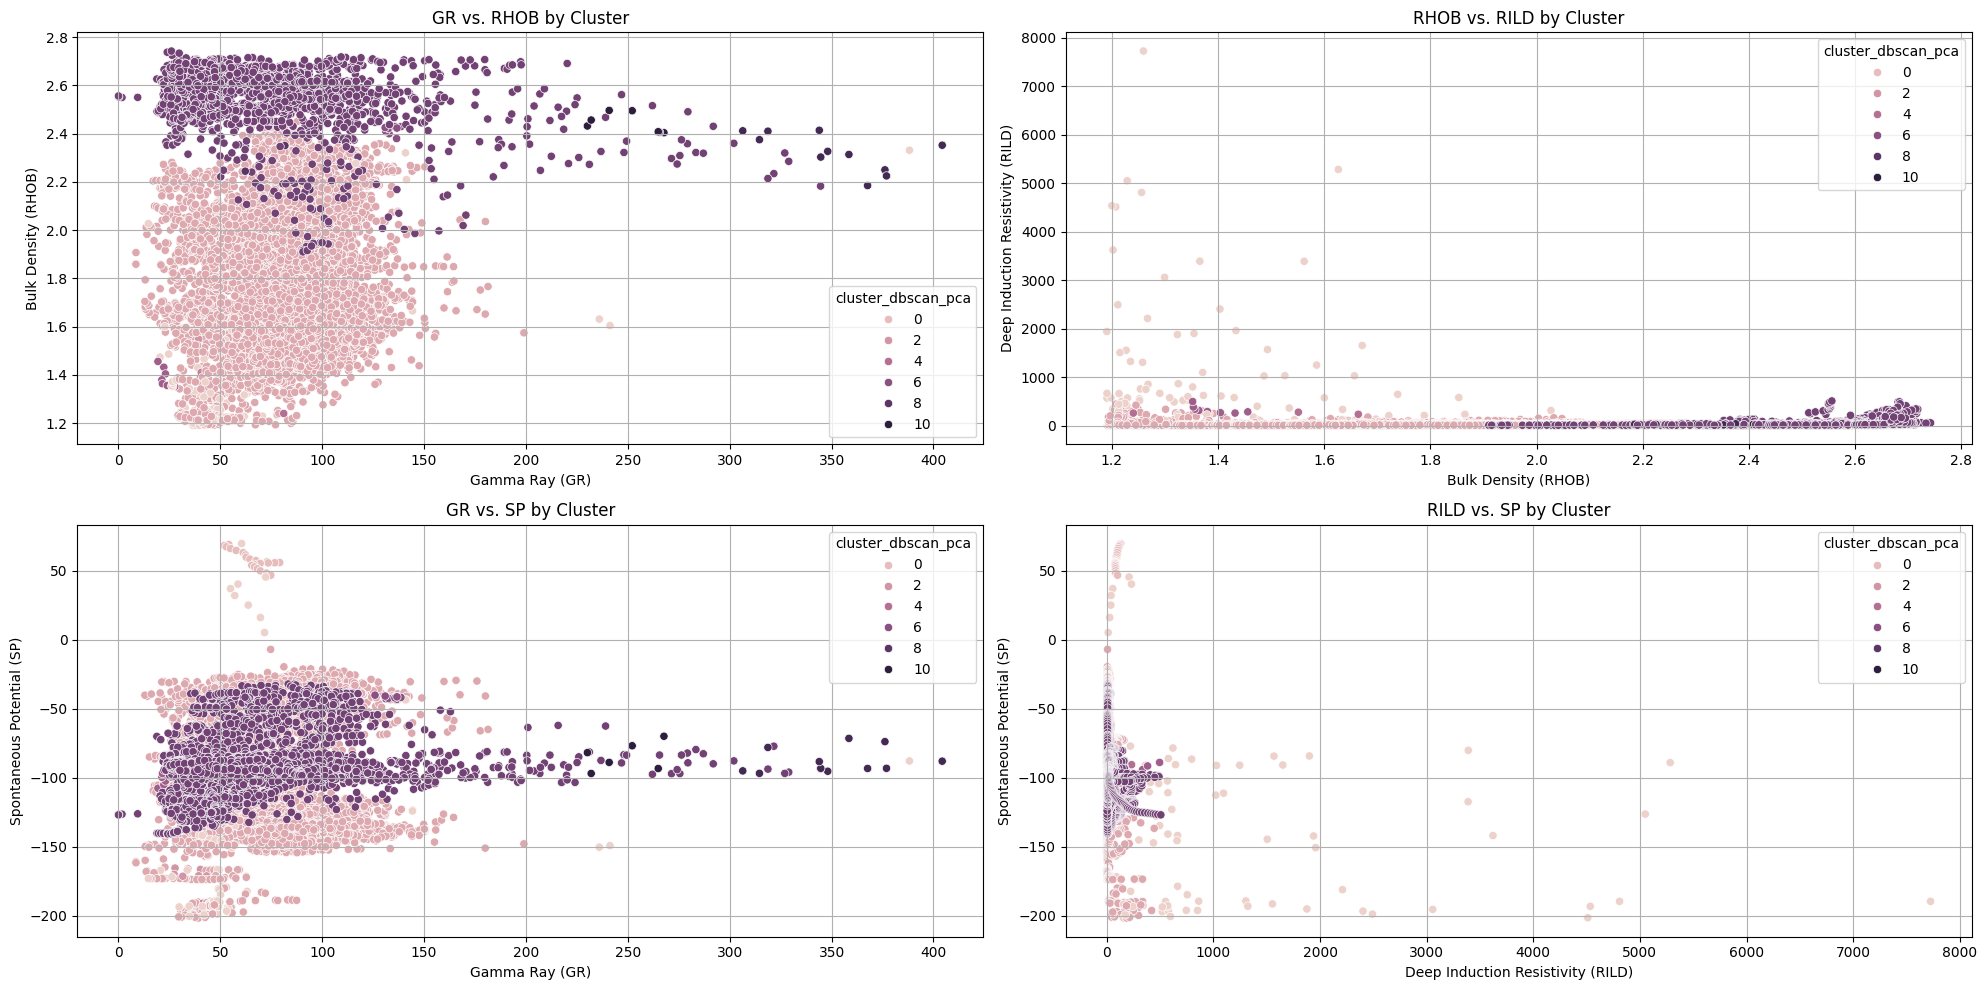

In [130]:

fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # Create 2x2 subplots

# 1. GR vs. RHOB Crossplot
sns.scatterplot(ax=axes[0, 0], x='GR', y='RHOB', hue='cluster_dbscan_pca', data=litho)
axes[0, 0].set_title('GR vs. RHOB by Cluster')
axes[0, 0].set_xlabel('Gamma Ray (GR)')
axes[0, 0].set_ylabel('Bulk Density (RHOB)')
axes[0, 0].grid(True)

# 2. RHOB vs. RILD Crossplot
sns.scatterplot(ax=axes[0, 1], x='RHOB', y='RILD', hue='cluster_dbscan_pca', data=litho)
axes[0, 1].set_title('RHOB vs. RILD by Cluster')
axes[0, 1].set_xlabel('Bulk Density (RHOB)')
axes[0, 1].set_ylabel('Deep Induction Resistivity (RILD)')
axes[0, 1].grid(True)

# 3. GR vs. SP Crossplot
sns.scatterplot(ax=axes[1, 0], x='GR', y='SP', hue='cluster_dbscan_pca', data=litho)
axes[1, 0].set_title('GR vs. SP by Cluster')
axes[1, 0].set_xlabel('Gamma Ray (GR)')
axes[1, 0].set_ylabel('Spontaneous Potential (SP)')
axes[1, 0].grid(True)

# 4. RILD vs. SP Crossplot
sns.scatterplot(ax=axes[1, 1], x='RILD', y='SP', hue='cluster_dbscan_pca', data=litho)
axes[1, 1].set_title('RILD vs. SP by Cluster')
axes[1, 1].set_xlabel('Deep Induction Resistivity (RILD)')
axes[1, 1].set_ylabel('Spontaneous Potential (SP)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

For the GR vs RHOB crossplots:
    Shale Trend: A cluster appears in the upper-left region (high GR, low RHOB), indicating shale.
    Carbonate Trend: There is a cluster in the lower-right region (low GR, high RHOB), indicating carbonate.
    Sandstone Trend: There is a cluster in the lower-left region (low GR, low RHOB), indicating sandstone.
    Overlapping Clusters: There is significant overlap between clusters in the middle region, suggesting transitional lithofacies or interbedded layers.
    Cluster 6: Cluster 6 is very far to the upper right of the graph, this cluster indictae a dense shale
For RHOB vs RILD
    High Resistivity Trend: A cluster appears in the upper-right region (high RHOB, high RILD), indicating a tight formation or hydrocarbon-bearing zone.
    Low Resistivity Trend: Many clusters are concentrated in the lower-left region (low RHOB, low RILD), indicating water-saturated formations or shale.
    Cluster 6: Cluster 6 is again very far to the left and up on the graph, this again indicates a very dense material.
For GR vs. SP:
    Shale Trend: Clusters appear in the upper region (high GR, low SP), indicating shale.
    Permeable Zone Trend: Some clusters appear in the lower region (low GR, high SP), indicating permeable zones. However, there is not a very clear trend of high SP values.
    Overlapping Clusters: There is significant overlap between clusters, indicating complex lithology.  
For RILD vs SP:
    High Resistivity Trend: Clusters appear in the right region (high RILD, low SP), indicating tight formations or hydrocarbon-bearing zones.
    Low Resistivity Trend: Clusters appear in the left region (low RILD, low SP), indicating water-saturated formations or shale.
    No Clear Permeable Zone Trend: There is no clear trend of high SP values, which would indicate permeable zones.
    Cluster 6: Cluster 6 is again very far to the left on the graph.

Cluster 6 appears to be very different from other clusters and also clusters 2, 3 and 4 have odd results when the average well log values were calculated i.e low GR values (suggesting non-shale) were observed alongside low SP values (suggesting shale), so we likely need a further investigation    

C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

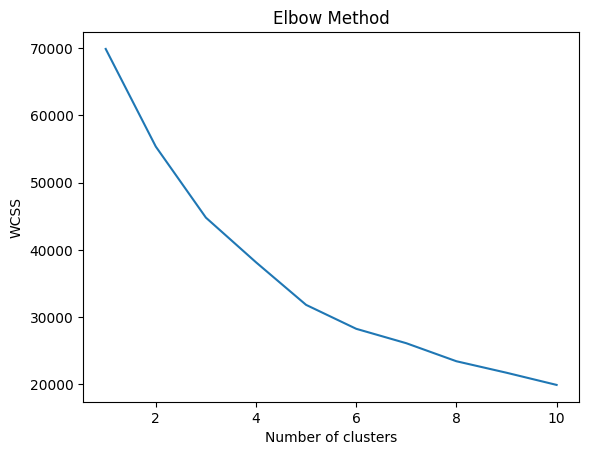

In [ ]:
#We will be using the elbow method to determine the optimal number of clusters needed for our K-Means Clustering
from sklearn.cluster import KMeans

wcss = []     #wcss means within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features_df)
    wcss.append(kmeans.inertia_)   #inertia is the within-cluster sum of squares

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()